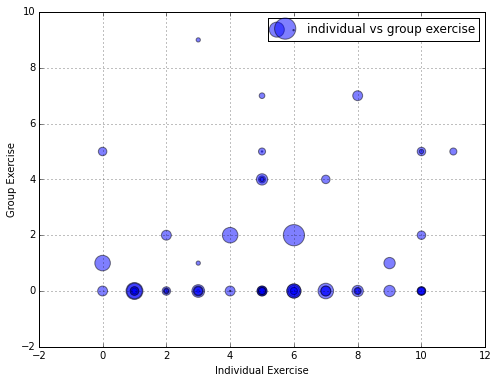

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
%matplotlib inline

DATA_FILE = 'survey_responses.csv'

pandas_data = pandas.read_csv(DATA_FILE)

individual_ex = pandas_data['Individial Exercise']
group_ex = pandas_data['Group Exercise']
pss = pandas_data['PSS']
pss_sizes = [(x ** 2) * 2 for x in pss]

plt.figure(figsize = (8,6), dpi = 800)

# plt.plot(np.linspace(2002,2016, 100), np.linspace(2002,2016, 100) * 0, color='black')
plt.scatter(individual_ex, group_ex, label='individual vs group exercise', s=pss_sizes, alpha=0.5)

plt.grid(True)
plt.xlabel('Individual Exercise')
plt.ylabel('Group Exercise')
plt.legend(loc = 'best')

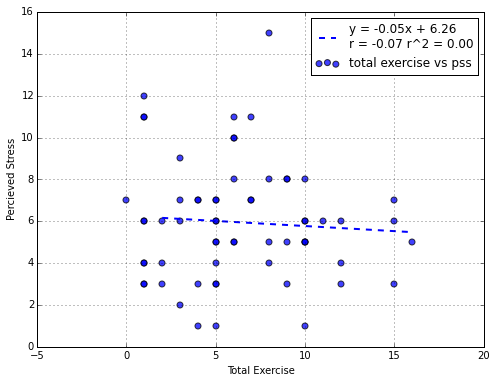

In [79]:
from scipy import stats

total_ex = [sum(x) for x in zip(individual_ex, group_ex)]

reg_x = np.linspace(2, 16, 40)
reg = stats.linregress(total_ex, pss)


plt.figure(figsize = (8, 6), dpi = 800)
plt.scatter(total_ex, pss, label='total exercise vs pss', s=36, alpha=0.75)
reg_label = 'y = {m:.2f}x + {b:.2f}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=reg.slope, b=reg.intercept, r=reg.rvalue, r2=reg.rvalue ** 2)
plt.plot(reg_x, reg.slope * reg_x + reg.intercept, '--', label=reg_label, linewidth=2)


plt.grid(True)
plt.xlabel('Total Exercise')
plt.ylabel('Percieved Stress')
plt.legend(loc = 'best')

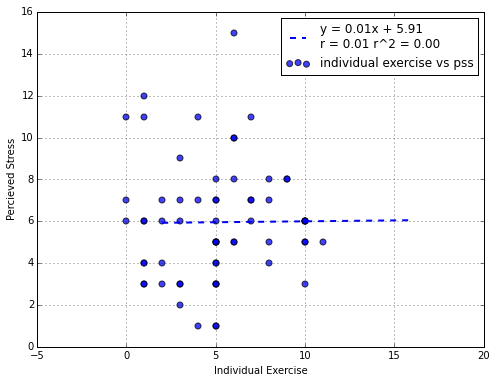

In [78]:
from scipy import stats


reg_x = np.linspace(2, 16, 40)
reg = stats.linregress(individual_ex, pss)


plt.figure(figsize = (8, 6), dpi = 800)
plt.scatter(individual_ex, pss, label='individual exercise vs pss', s=36, alpha=0.75)
reg_label = 'y = {m:.2f}x + {b:.2f}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=reg.slope, b=reg.intercept, r=reg.rvalue, r2=reg.rvalue ** 2)
plt.plot(reg_x, reg.slope * reg_x + reg.intercept, '--', label=reg_label, linewidth=2)


plt.grid(True)
plt.xlabel('Individual Exercise')
plt.ylabel('Percieved Stress')
plt.legend(loc = 'best')

20


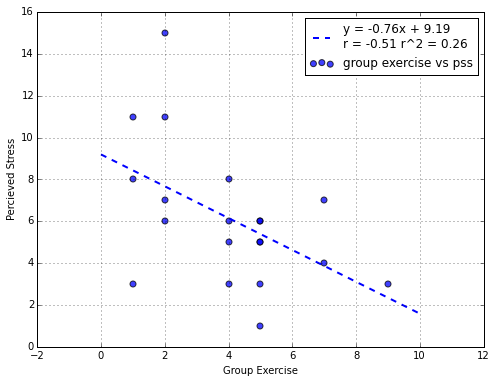

In [80]:
from scipy import stats

new_group = [(group_ex[i], pss[i]) for i in xrange(len(group_ex)) if group_ex[i] > 0]
new_group, new_pss = zip(*new_group)

reg_x = np.linspace(0, 10, 40)
reg = stats.linregress(new_group, new_pss)

print len(new_group)

plt.figure(figsize = (8, 6), dpi = 800)
plt.scatter(new_group, new_pss, label='group exercise vs pss', s=36, alpha=0.75)
reg_label = 'y = {m:.2f}x + {b:.2f}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=reg.slope, b=reg.intercept, r=reg.rvalue, r2=reg.rvalue ** 2)
plt.plot(reg_x, reg.slope * reg_x + reg.intercept, '--', label=reg_label, linewidth=2)


plt.grid(True)
plt.xlabel('Group Exercise')
plt.ylabel('Percieved Stress')
plt.legend(loc = 'best')

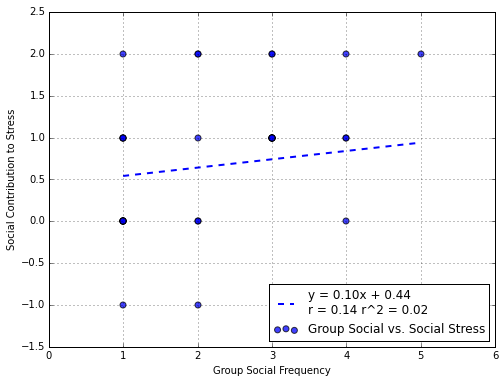

In [76]:
import numpy
group_social = pandas_data['Group Social']
social_stress = pandas_data['Social Stress']

group_social_stress = [(group_social[i], social_stress[i]) for i in xrange(len(group_social)) if not numpy.isnan(group_social[i]) 
                       and not numpy.isnan(social_stress[i])]
new_social, new_stress = zip(*group_social_stress)


reg_x = np.linspace(1, 5, 40)
reg = stats.linregress(new_social, new_stress)

plt.figure(figsize = (8, 6), dpi = 800)
plt.scatter(new_social, new_stress, label='Group Social vs. Social Stress', s=36, alpha=0.75)
reg_label = 'y = {m:.2f}x + {b:.2f}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=reg.slope, b=reg.intercept, r=reg.rvalue, r2=reg.rvalue ** 2)
plt.plot(reg_x, reg.slope * reg_x + reg.intercept, '--', label=reg_label, linewidth=2)

plt.grid(True)
plt.xlabel('Group Social Frequency')
plt.ylabel('Social Contribution to Stress')
plt.legend(loc = 'lower right')
